In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cifar10 = tf.keras.datasets.cifar10
#bring CIFAR10 dataset from tensorflow
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()
#load data separately in to train_images,train_label,test_images,test_data

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
#check each dataset shape and number of data size
print(train_images.shape)
print(len(train_images))

print(test_images.shape)
print(len(test_images))

(50000, 32, 32, 3)
50000
(10000, 32, 32, 3)
10000


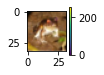

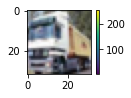

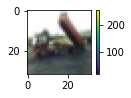

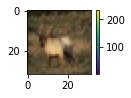

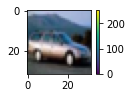

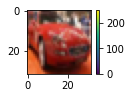

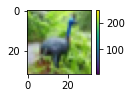

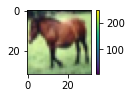

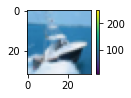

In [ ]:
# data visualization
plt.figure(figsize=(3,3)) # draw figure
for i in range(9):
  plt.subplot(3,3,i+1) # subplot into 3*3 array shape
  plt.imshow(train_images[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()


In [ ]:
# model building
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  # normalize dataset values to between 0-1
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  # convolutional layer with 32 many and 3*3 sized kernels , use ReLu for activation function
  tf.keras.layers.MaxPooling2D(),
  # maxpooling layers 
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  # flatten layers from n dimension array form to 1 dimension
  tf.keras.layers.Dense(128, activation='relu'),
  # connect 128 nodes using dense layer 
  tf.keras.layers.Dense(10)
  # because we want 10 different classes to be defined connect to 10 nodes
])

    

# model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile model using 'adam' for optimizer, crossentropy for loss function

In [ ]:
model.fit(train_images, train_labels, epochs=15)
# actually train model epochs(=15) times

Epoch 1/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5594 - accuracy: 0.4271
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1749 - accuracy: 0.5818
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0040 - accuracy: 0.6463
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8993 - accuracy: 0.6850
Epoch 5/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8125 - accuracy: 0.7157
Epoch 6/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7483 - accuracy: 0.7383
Epoch 7/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6920 - accuracy: 0.7567
Epoch 8/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6393 - accuracy: 0.7748
Epoch 9/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5941 - accuracy: 0.7913
Epoch 10/15
1563/1563 [==============================] - 12s 8ms/step - l

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
# check the result value of loss and accuracy

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.0571 - accuracy: 0.7034 - 1s/epoch - 4ms/step

Test accuracy: 0.7034000158309937
